In [1]:
import pandas 
movies = pandas.read_csv("movie_lens_completo.csv")
movies.head()

,id,title,release_date,imdb_url,user_id,item_id,rating,timestamp,age,sex,ocuppation,zip_code,faixa_etaria,genero
0,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,244,1,4,1997-11-27 04:20:05,28,M,technician,80525,20-29,Animation
1,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,298,1,5,1998-01-06 22:34:21,44,M,executive,01581,40-49,Animation
2,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,253,1,5,1998-04-03 18:34:27,26,F,librarian,22903,20-29,Animation
3,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,305,1,5,1998-02-01 08:52:33,23,M,programmer,94086,20-29,Animation
4,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,6,1,4,1997-12-31 20:17:58,42,M,executive,98101,40-49,Animation


In [2]:
qnt_dados = movies.shape[0]
print("Dados: {}".format(qnt_dados))

qnt_movies = movies["id"].unique().size
print("Movies: {}".format(qnt_movies))

qnt_users = movies["user_id"].unique().size
print("Users: {}".format(qnt_users))

Dados: 100000
Movies: 1682
Users: 943


In [3]:
movies.isnull().sum()

id               0
title            0
release_date     9
imdb_url        13
user_id          0
item_id          0
rating           0
timestamp        0
age              0
sex              0
ocuppation       0
zip_code         0
faixa_etaria     0
genero           0
dtype: int64

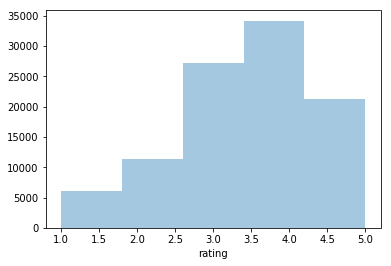

In [5]:
%matplotlib inline

import seaborn as sns
sns.distplot(movies['rating'], bins=5, kde=False)

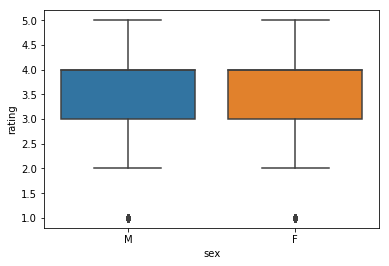

In [6]:
sns.boxplot(x="sex", y="rating", data=movies)

In [7]:
import numpy as np
movies.groupby("sex")["rating"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,25740.0,3.531507,1.170951,1.0,3.0,4.0,4.0,5.0
M,74260.0,3.529289,1.109556,1.0,3.0,4.0,4.0,5.0


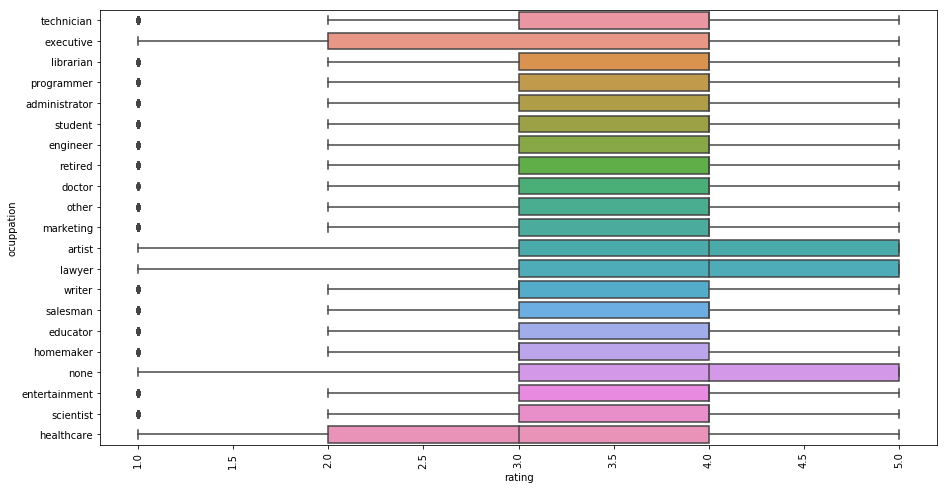

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))

plt.xticks(rotation=90)

sns.boxplot(x="rating", y="ocuppation", data=movies)

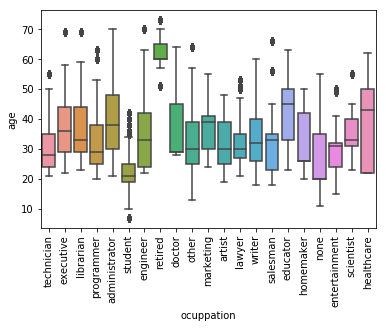

In [12]:
import matplotlib.pyplot as plt

plt.xticks(rotation=90)

sns.boxplot(x="ocuppation", y="age", data=movies)

In [15]:
movies_dmy = pandas.get_dummies(movies, columns=["sex", "ocuppation", "genero"])
movies_dmy.head()

,id,title,release_date,imdb_url,user_id,item_id,rating,timestamp,age,zip_code,...,genero_Film-Noir,genero_Horror,genero_Musical,genero_Mystery,genero_Romance,genero_Sci-Fi,genero_Thriller,genero_War,genero_Western,genero_unknown
0,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,244,1,4,1997-11-27 04:20:05,28,80525,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,298,1,5,1998-01-06 22:34:21,44,01581,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,253,1,5,1998-04-03 18:34:27,26,22903,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,305,1,5,1998-02-01 08:52:33,23,94086,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,6,1,4,1997-12-31 20:17:58,42,98101,...,0,0,0,0,0,0,0,0,0,0


In [16]:
movies_dmy.columns

Index(['id', 'title', 'release_date', 'imdb_url', 'user_id', 'item_id',
       'rating', 'timestamp', 'age', 'zip_code', 'faixa_etaria', 'sex_F',
       'sex_M', 'ocuppation_administrator', 'ocuppation_artist',
       'ocuppation_doctor', 'ocuppation_educator', 'ocuppation_engineer',
       'ocuppation_entertainment', 'ocuppation_executive',
       'ocuppation_healthcare', 'ocuppation_homemaker', 'ocuppation_lawyer',
       'ocuppation_librarian', 'ocuppation_marketing', 'ocuppation_none',
       'ocuppation_other', 'ocuppation_programmer', 'ocuppation_retired',
       'ocuppation_salesman', 'ocuppation_scientist', 'ocuppation_student',
       'ocuppation_technician', 'ocuppation_writer', 'genero_Action',
       'genero_Adventure', 'genero_Animation', 'genero_Children's',
       'genero_Comedy', 'genero_Crime', 'genero_Documentary', 'genero_Drama',
       'genero_Fantasy', 'genero_Film-Noir', 'genero_Horror', 'genero_Musical',
       'genero_Mystery', 'genero_Romance', 'genero_Sci-Fi',

In [20]:
zipcode = pandas.read_csv("http://bit.ly/2nEJKar")
zipcode.head()

,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages
0,705,STANDARD,AIBONITO,PR,PRIMARY,18.14,-66.26,NA-US-PR-AIBONITO,False,NaN,NaN,NaN
1,610,STANDARD,ANASCO,PR,PRIMARY,18.28,-67.14,NA-US-PR-ANASCO,False,NaN,NaN,NaN
2,611,PO BOX,ANGELES,PR,PRIMARY,18.28,-66.79,NA-US-PR-ANGELES,False,NaN,NaN,NaN
3,612,STANDARD,ARECIBO,PR,PRIMARY,18.45,-66.73,NA-US-PR-ARECIBO,False,NaN,NaN,NaN
4,601,STANDARD,ADJUNTAS,PR,PRIMARY,18.16,-66.72,NA-US-PR-ADJUNTAS,False,NaN,NaN,NaN


In [21]:
zipcode_state = zipcode[["Zipcode", "State"]]
zipcode_state.head()

,Zipcode,State
0,705,PR
1,610,PR
2,611,PR
3,612,PR
4,601,PR


In [22]:
movies["zip_code"].head()

0    80525
1    01581
2    22903
3    94086
4    98101
Name: zip_code, dtype: object

In [23]:
zipcode_state["Zipcode"].head()

0    705
1    610
2    611
3    612
4    601
Name: Zipcode, dtype: int64

In [24]:
zipcode_state_final = zipcode_state.copy()
zipcode_state_final["Zipcode"] = zipcode_state["Zipcode"].astype("str")

In [25]:
movies_with_state = pandas.merge(movies_dmy,
                                zipcode_state_final,
                                how="left",
                                left_on="zip_code",
                                right_on = "Zipcode")
movies_with_state.head()

,id,title,release_date,imdb_url,user_id,item_id,rating,timestamp,age,zip_code,...,genero_Musical,genero_Mystery,genero_Romance,genero_Sci-Fi,genero_Thriller,genero_War,genero_Western,genero_unknown,Zipcode,State
0,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,244,1,4,1997-11-27 04:20:05,28,80525,...,0,0,0,0,0,0,0,0,80525,CO
1,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,298,1,5,1998-01-06 22:34:21,44,01581,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,253,1,5,1998-04-03 18:34:27,26,22903,...,0,0,0,0,0,0,0,0,22903,VA
3,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,305,1,5,1998-02-01 08:52:33,23,94086,...,0,0,0,0,0,0,0,0,94086,CA
4,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,6,1,4,1997-12-31 20:17:58,42,98101,...,0,0,0,0,0,0,0,0,98101,WA


In [26]:
movies_with_state.isnull().sum()

id                              0
title                           0
release_date                    9
imdb_url                       13
user_id                         0
item_id                         0
rating                          0
timestamp                       0
age                             0
zip_code                        0
faixa_etaria                    0
sex_F                           0
sex_M                           0
ocuppation_administrator        0
ocuppation_artist               0
ocuppation_doctor               0
ocuppation_educator             0
ocuppation_engineer             0
ocuppation_entertainment        0
ocuppation_executive            0
ocuppation_healthcare           0
ocuppation_homemaker            0
ocuppation_lawyer               0
ocuppation_librarian            0
ocuppation_marketing            0
ocuppation_none                 0
ocuppation_other                0
ocuppation_programmer           0
ocuppation_retired              0
ocuppation_sal

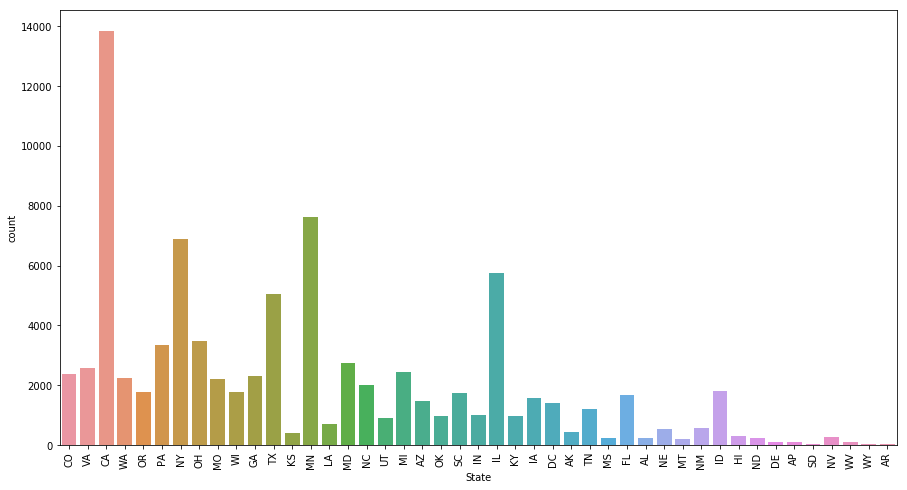

In [27]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

sns.countplot(movies_with_state["State"])

In [30]:
movies_final = pandas.get_dummies(movies_with_state, columns=["State"])
movies_final.head()

,id,title,release_date,imdb_url,user_id,item_id,rating,timestamp,age,zip_code,...,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,State_WV,State_WY
0,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,244,1,4,1997-11-27 04:20:05,28,80525,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,298,1,5,1998-01-06 22:34:21,44,01581,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,253,1,5,1998-04-03 18:34:27,26,22903,...,0,0,0,0,0,1,0,0,0,0
3,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,305,1,5,1998-02-01 08:52:33,23,94086,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,6,1,4,1997-12-31 20:17:58,42,98101,...,0,0,0,0,0,0,1,0,0,0


In [31]:
movies_final.to_csv("movielens_final.csv", index=False)

In [33]:
dados_matriz = [[1,2],
               [2,1],
               [2,3.2],
               [3,2.5],
               [4,1],
               [1.2,1],
               [0.2,7.3]]
dados = pandas.DataFrame(dados_matriz, columns=["X1","X2"])
dados

,X1,X2
0,1.0,2.0
1,2.0,1.0
2,2.0,3.2
3,3.0,2.5
4,4.0,1.0
5,1.2,1.0
6,0.2,7.3


In [34]:
def dist(a,b):
    return ((a[0]-b[0])**2 + (a[1]-b[1])**2)*0.5

def dis(a,b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [35]:
dado_a = dados_matriz[0]
dado_b = dados_matriz[2]
d_ab = dis(dado_a, dado_b)

print("""
a distancia de {} a {} é {}
""".format(dado_a, dado_b, d_ab))


a distancia de [1, 2] a [2, 3.2] é 1.562049935181331



In [36]:
def dist_n(a,b):
    somatorio = 0.0
    for i in range(len(a)):
        somatorio = somatorio + (a[i] - b[i])**2
    return np.sqrt(somatorio)

In [40]:
dist_n([1,2,3,10],[1,2,9,28])

18.973665961010276

In [44]:
all_columns = list(movies_final.columns)

occupation_state_columns = []

for column in all_columns:
    if column.startswith("State_") or column.startswith("ocuppation_"):
        occupation_state_columns.append(column)
print("""
As colunas selecionadas foram: \n {}
""".format(occupation_state_columns))


As colunas selecionadas foram: 
 ['ocuppation_administrator', 'ocuppation_artist', 'ocuppation_doctor', 'ocuppation_educator', 'ocuppation_engineer', 'ocuppation_entertainment', 'ocuppation_executive', 'ocuppation_healthcare', 'ocuppation_homemaker', 'ocuppation_lawyer', 'ocuppation_librarian', 'ocuppation_marketing', 'ocuppation_none', 'ocuppation_other', 'ocuppation_programmer', 'ocuppation_retired', 'ocuppation_salesman', 'ocuppation_scientist', 'ocuppation_student', 'ocuppation_technician', 'ocuppation_writer', 'State_AK', 'State_AL', 'State_AP', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MD', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT'

In [45]:
columns_to_select = ["age", "sex_F", "sex_M", "user_id"] + occupation_state_columns

In [46]:
columns_to_select

['age',
 'sex_F',
 'sex_M',
 'user_id',
 'ocuppation_administrator',
 'ocuppation_artist',
 'ocuppation_doctor',
 'ocuppation_educator',
 'ocuppation_engineer',
 'ocuppation_entertainment',
 'ocuppation_executive',
 'ocuppation_healthcare',
 'ocuppation_homemaker',
 'ocuppation_lawyer',
 'ocuppation_librarian',
 'ocuppation_marketing',
 'ocuppation_none',
 'ocuppation_other',
 'ocuppation_programmer',
 'ocuppation_retired',
 'ocuppation_salesman',
 'ocuppation_scientist',
 'ocuppation_student',
 'ocuppation_technician',
 'ocuppation_writer',
 'State_AK',
 'State_AL',
 'State_AP',
 'State_AR',
 'State_AZ',
 'State_CA',
 'State_CO',
 'State_DC',
 'State_DE',
 'State_FL',
 'State_GA',
 'State_HI',
 'State_IA',
 'State_ID',
 'State_IL',
 'State_IN',
 'State_KS',
 'State_KY',
 'State_LA',
 'State_MD',
 'State_MI',
 'State_MN',
 'State_MO',
 'State_MS',
 'State_MT',
 'State_NC',
 'State_ND',
 'State_NE',
 'State_NM',
 'State_NV',
 'State_NY',
 'State_OH',
 'State_OK',
 'State_OR',
 'State_PA

In [47]:
df_user =movies_final[columns_to_select]
df_user.head()

,age,sex_F,sex_M,user_id,ocuppation_administrator,ocuppation_artist,ocuppation_doctor,ocuppation_educator,ocuppation_engineer,ocuppation_entertainment,...,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,State_WV,State_WY
0,28,0,1,244,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44,0,1,298,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,1,0,253,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,23,0,1,305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,1,6,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
df_user.shape

(100000, 70)

In [49]:
df_user_final = df_user.drop_duplicates()
df_user_final.shape

(943, 70)

In [50]:
df_user_ml = df_user_final.drop("user_id", axis=1)

In [53]:
df_user_ml.head(1)

,age,sex_F,sex_M,ocuppation_administrator,ocuppation_artist,ocuppation_doctor,ocuppation_educator,ocuppation_engineer,ocuppation_entertainment,ocuppation_executive,...,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,State_WV,State_WY
0,28,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
the_chosen_one = df_user_ml.loc[0] #linha com indice 0

In [52]:
others = df_user_ml.loc[1:]

In [54]:
indexes = others.index


In [55]:
index_min = indexes[0]

In [56]:
dist_min = dist_n(the_chosen_one, others.loc[index_min])

In [57]:
dist_min

16.09347693943108

In [58]:
for index in indexes:
    some_user = others.loc[index]
    dist_local = dist_n(the_chosen_one, some_user)
    
    if(dist_local < dist_min):
        dist_min = dist_local
        index_min = index

In [59]:
dist_min

1.0

In [60]:
index_min

376

In [61]:
print(the_chosen_one.to_string())

age                         28
sex_F                        0
sex_M                        1
ocuppation_administrator     0
ocuppation_artist            0
ocuppation_doctor            0
ocuppation_educator          0
ocuppation_engineer          0
ocuppation_entertainment     0
ocuppation_executive         0
ocuppation_healthcare        0
ocuppation_homemaker         0
ocuppation_lawyer            0
ocuppation_librarian         0
ocuppation_marketing         0
ocuppation_none              0
ocuppation_other             0
ocuppation_programmer        0
ocuppation_retired           0
ocuppation_salesman          0
ocuppation_scientist         0
ocuppation_student           0
ocuppation_technician        1
ocuppation_writer            0
State_AK                     0
State_AL                     0
State_AP                     0
State_AR                     0
State_AZ                     0
State_CA                     0
State_CO                     1
State_DC                     0
State_DE

In [62]:
similar_to_the_chosen_one = others.loc[index_min]
print(similar_to_the_chosen_one.to_string())

age                         27
sex_F                        0
sex_M                        1
ocuppation_administrator     0
ocuppation_artist            0
ocuppation_doctor            0
ocuppation_educator          0
ocuppation_engineer          0
ocuppation_entertainment     0
ocuppation_executive         0
ocuppation_healthcare        0
ocuppation_homemaker         0
ocuppation_lawyer            0
ocuppation_librarian         0
ocuppation_marketing         0
ocuppation_none              0
ocuppation_other             0
ocuppation_programmer        0
ocuppation_retired           0
ocuppation_salesman          0
ocuppation_scientist         0
ocuppation_student           0
ocuppation_technician        1
ocuppation_writer            0
State_AK                     0
State_AL                     0
State_AP                     0
State_AR                     0
State_AZ                     0
State_CA                     0
State_CO                     1
State_DC                     0
State_DE

In [63]:
dados

,X1,X2
0,1.0,2.0
1,2.0,1.0
2,2.0,3.2
3,3.0,2.5
4,4.0,1.0
5,1.2,1.0
6,0.2,7.3


In [64]:
centroid_x1 = [dados["X1"].mean()]
centroid_x2 = [dados["X2"].mean()]

print("""
O centroid dos dados é [{}, {}]""".format(centroid_x1, centroid_x2))



O centroid dos dados é [[1.9142857142857141], [2.5714285714285716]]


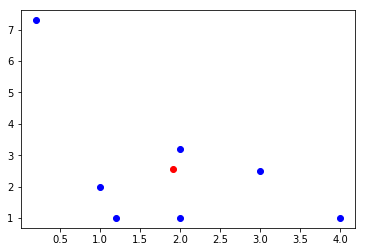

In [65]:
plt.plot(dados["X1"], dados["X2"], "ob")
plt.plot(centroid_x1, centroid_x2, "or")

In [66]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km = km.fit(dados)

In [67]:
centers = km.cluster_centers_
c_to_plot=centers.T

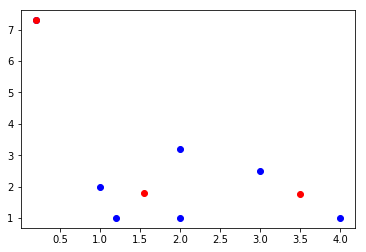

In [69]:
import matplotlib.pyplot as plt

plt.plot(dados["X1"], dados["X2"], "ob")
plt.plot(c_to_plot[0], c_to_plot[1], "or")

In [70]:
def plot_clusters (df,km_model,colors=["r","b","g"],centroid_color = "k"):
    # transforma os dados do dataframe em matriz
    df_matrix = df.values
    # quantidade de linhas do dataframe
    lines = df_matrix.shape[0]
    # labels da clusterização
    labels = km_model.labels_
    
    # Itera nas linhas do dado
    for l in range(lines):
        # coloca na variável label o label da linha l
        label = labels[l]
        # coloca na variável x o valor da primeira coluna da linha l
        x = [df_matrix[l][0]]
        # coloca na variável y o valor da segunda coluna da linha l
        y = [df_matrix[l][1]]

        # plota o ponto x,y como um 'bolinha' com a cor referente ao label
        plt.plot(x,y,"o"+colors[label])
    
    # Coloca os centroides do modelo na variável centroides_t
    centroides_t = km_model.cluster_centers_.T
    #plota os centroides como uma 'estrelinha' com a cor escolhida
    plt.plot(centroides_t[0],centroides_t[1],"*"+centroid_color)

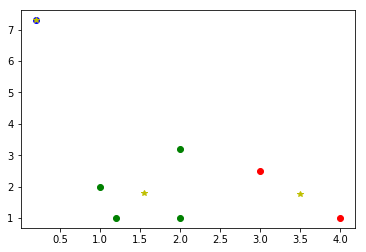

In [71]:
plot_clusters(dados, km, centroid_color="y")

In [73]:
df_user_ml = df_user_final.drop("user_id", axis=1)

In [74]:
km_users = KMeans(n_clusters=3, random_state=0)
km_users = km_users.fit(df_user_ml)

In [75]:
labels = pandas.DataFrame(km_users.labels_, columns=["label"])
labels.groupby("label").size()

label
0    377
1    338
2    228
dtype: int64

In [76]:
centroides = km_users.cluster_centers_
d12 = dist_n(centroides[0],centroides[1])
d13 = dist_n(centroides[0],centroides[2])
d23 = dist_n(centroides[1],centroides[2])

print("""
D(c1,c2)={};
D(c1,c3)={};
D(c2,c3)={};
""".format(d12,d13,d23))


D(c1,c2)=12.257063642809737;
D(c1,c3)=28.905591121793687;
D(c2,c3)=16.652380985025722;



In [78]:
labels.size

943

In [79]:
m_3d = [[1,2,3],
           [1.2,0.2,3.4],
           [9,1,2],
           [6,5,4],
           [7,2,4],
           [2,6,4],
           [4,7,8],
           [3,4,7]]
dados_3d = pandas.DataFrame(m_3d,columns=["X1","X2","X3"])



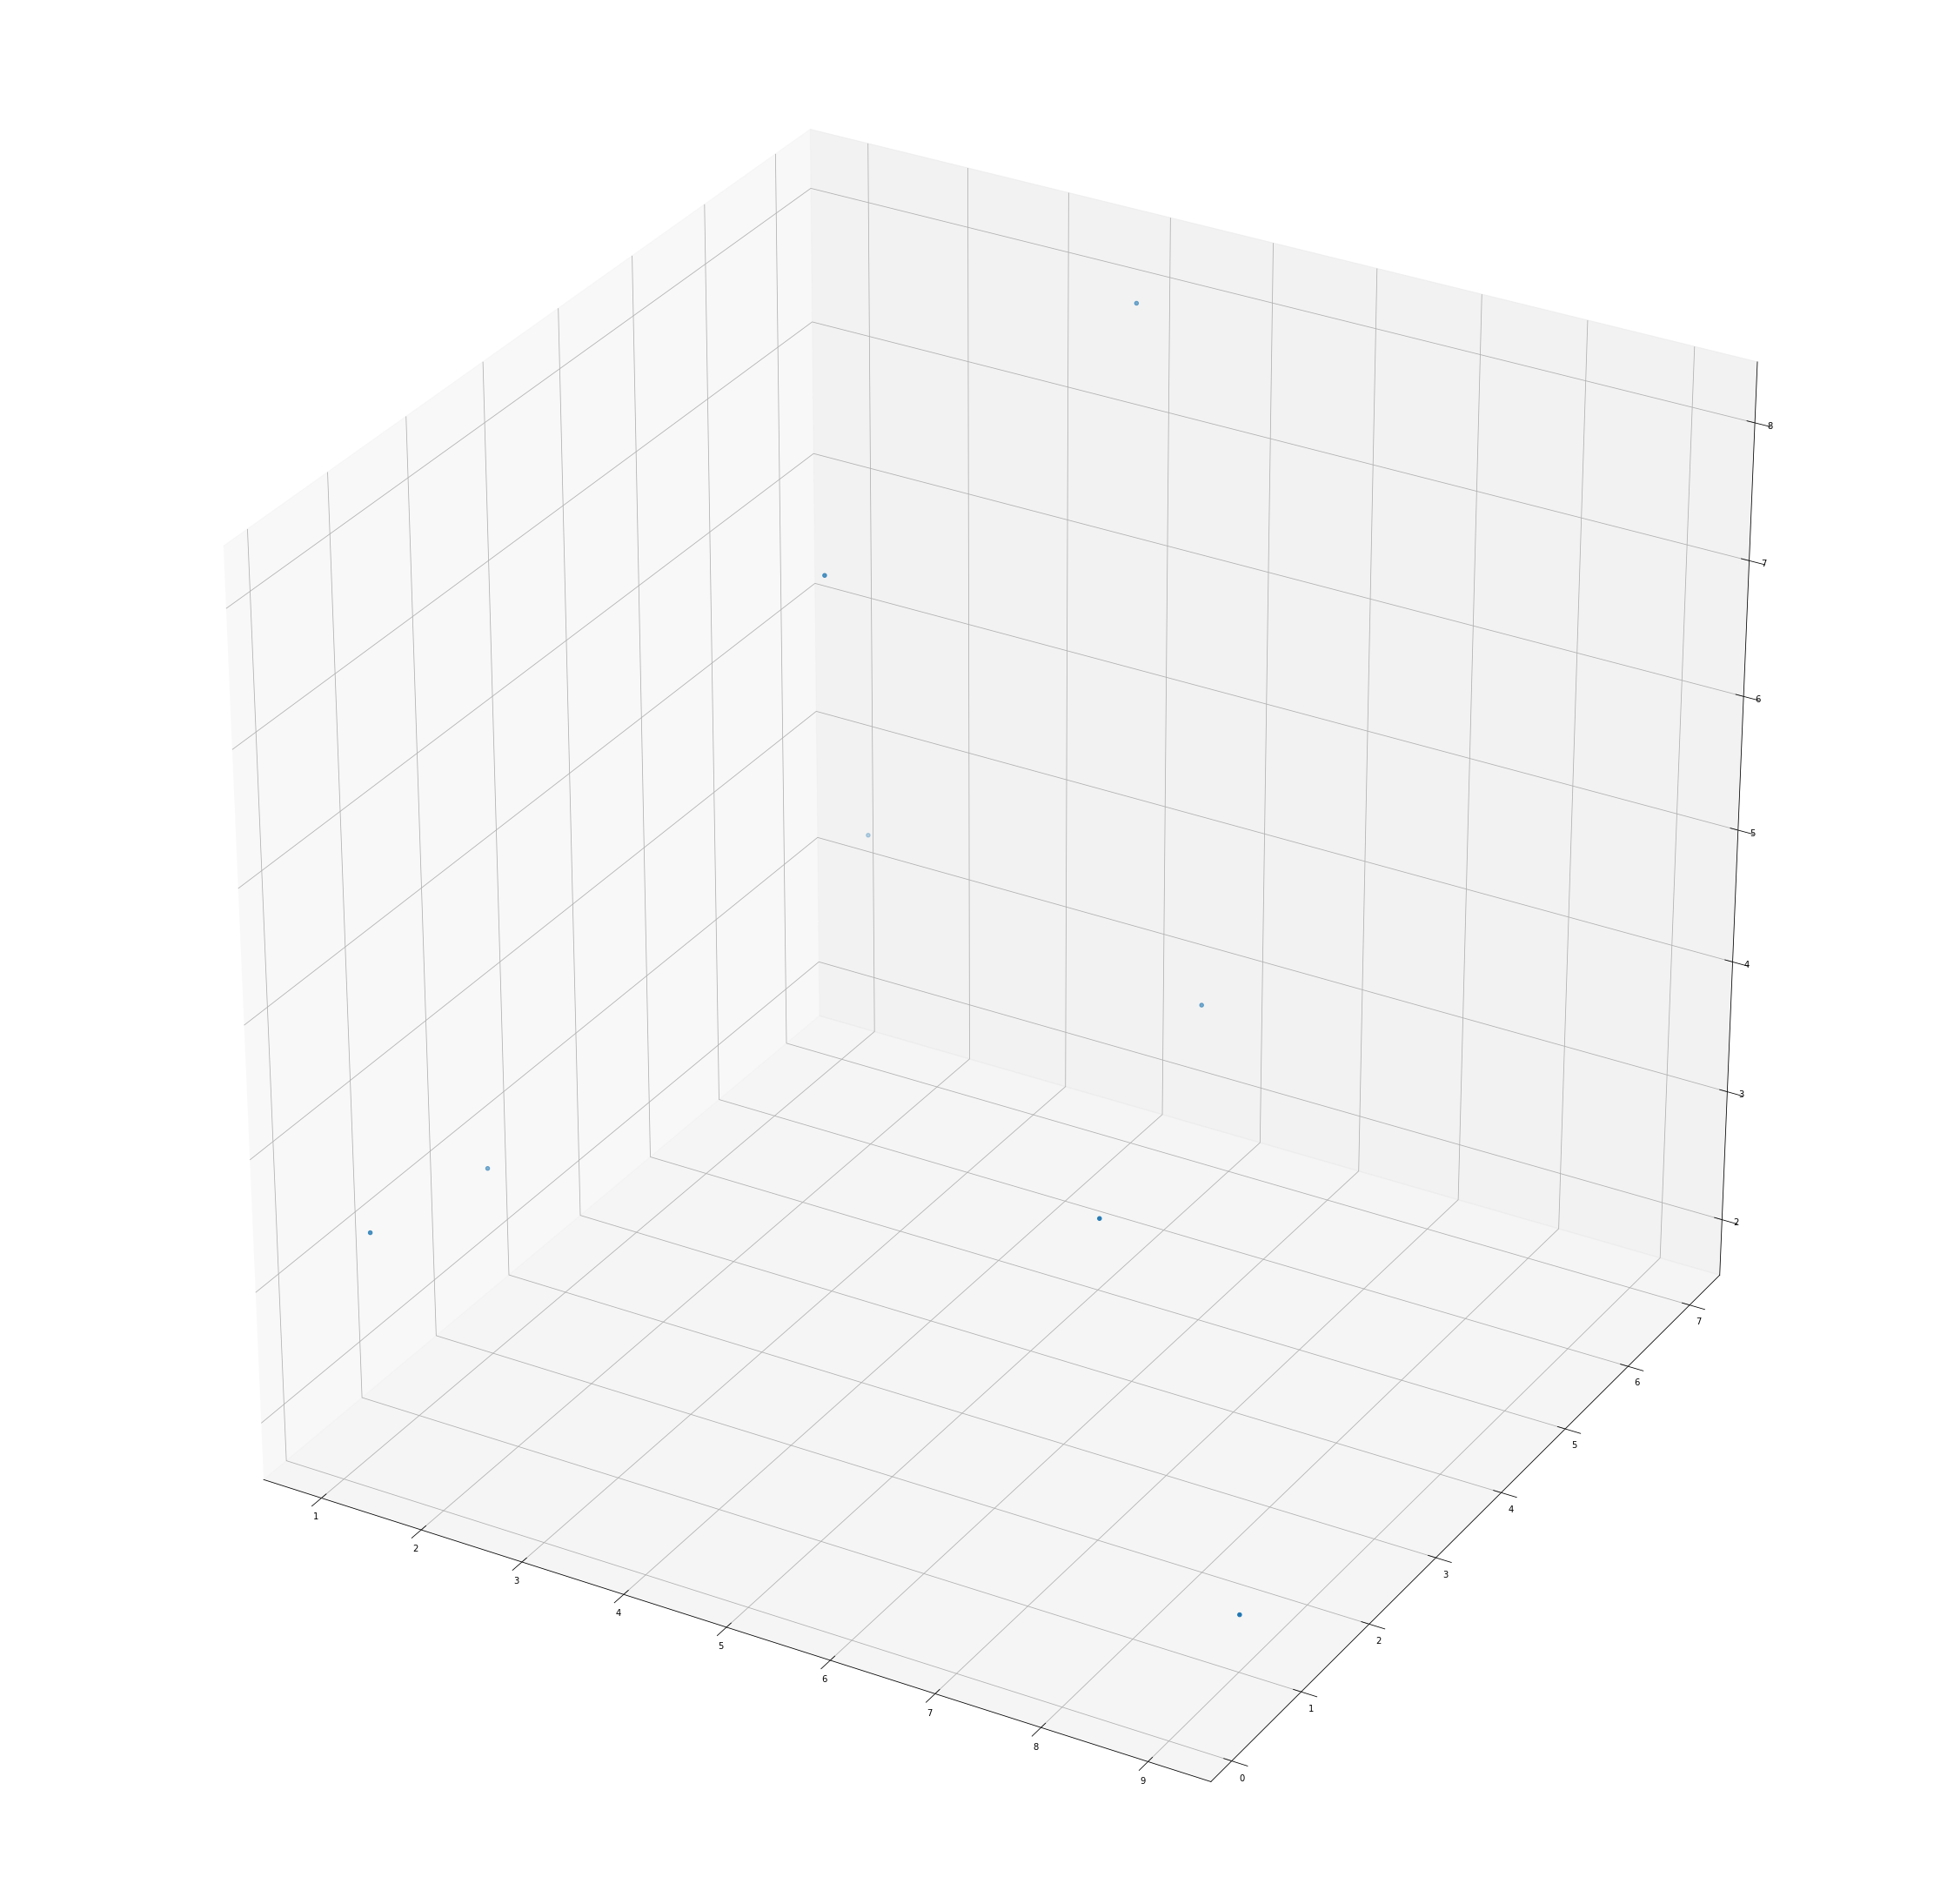

In [80]:
from mpl_toolkits import mplot3d


fig = plt.figure(figsize=(40,40))
ax = plt.axes(projection='3d')


ax.scatter3D(dados_3d["X1"],dados_3d["X2"],dados_3d["X3"])

In [81]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
d_2d = pca_model.fit_transform(dados_3d)

In [82]:
d_2d

array([[-0.71396244,  3.61832921],
       [ 0.23096049,  4.38532598],
       [ 5.80095992, -1.21892919],
       [ 0.58425648, -2.12354168],
       [ 2.93118972, -1.08543817],
       [-2.71403991,  0.18304974],
       [-3.7829283 , -3.30344652],
       [-2.33643597, -0.45534937]])

In [83]:
dados_2d = pandas.DataFrame(d_2d, columns=["z1", "z2"])
dados_2d

,z1,z2
0,-0.713962,3.618329
1,0.230960,4.385326
2,5.800960,-1.218929
3,0.584256,-2.123542
4,2.931190,-1.085438
5,-2.714040,0.183050
6,-3.782928,-3.303447
7,-2.336436,-0.455349


In [84]:
dados_3d

,X1,X2,X3
0,1.0,2.0,3.0
1,1.2,0.2,3.4
2,9.0,1.0,2.0
3,6.0,5.0,4.0
4,7.0,2.0,4.0
5,2.0,6.0,4.0
6,4.0,7.0,8.0
7,3.0,4.0,7.0


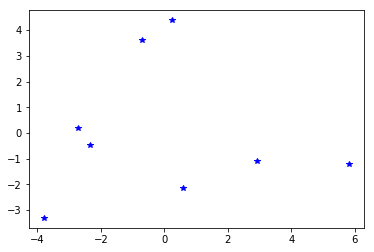

In [85]:
plt.plot(dados_2d["z1"], dados_2d["z2"], "*b")